# STA 160- Cars Data Analysis

In this project we will be taking a closer look at the Automobile dataset from the UCI Machine Learning Repository. Since the analysis is pretty much up to me, I will split this into 2 parts! 

* **Part 1: EDA/Examining relationships between categorical features**
    * Data Visualization
    * Contingency Tables
    * Chi-Squared Tests
    * Heat Maps, Scatterplots
* **Part 2: Pre-processing/Classification**
    * Goal: Classify whether a car is risky/not risky
    * Which pre-processing techniques worked well? Why?
    * Which models worked well? Why?
        * Could the relationships among variables be to blame?

## Initial Data Inspection & Data Cleaning

The first thing I want to do when I get a hold of data is to take a quick look at what the data looks like, and clean up the data if needed.

In [1]:
# Import all of our data science tools!

from PIL import Image
import pandas as pd
import numpy as np
import pandas_profiling
import scipy.stats as stats
import statsmodels
from statsmodels.graphics.mosaicplot import mosaic

import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import missingno
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Rename columns
cars = pd.read_csv('~/Downloads/imports-85.data', header = None)
cars.columns = ['symboling'
               ,'losses'
               ,'make'
               ,'fuel_type'
               ,'aspiration'
               ,'num_doors'
               ,'body_style'
               ,'drive_wheels'
               ,'engine_loc'
               ,'wheel_base'
               ,'length'
               ,'width'
               ,'height'
               ,'curb_weight'
               ,'engine_type'
               ,'num_cylinders'
               ,'engine_size'
               ,'fuel_system'
               ,'bore'
                ,'stroke'
               ,'compression-ratio'
               ,'horsepower'
               ,'peak-rpm'
               ,'city_mpg'
               ,'highway_mpg'
               ,'price']
cars.head()

symboling losses         make fuel_type aspiration num_doors   body_style  \
0          3      ?  alfa-romero       gas        std       two  convertible   
1          3      ?  alfa-romero       gas        std       two  convertible   
2          1      ?  alfa-romero       gas        std       two    hatchback   
3          2    164         audi       gas        std      four        sedan   
4          2    164         audi       gas        std      four        sedan   

  drive_wheels engine_loc  wheel_base  ...  engine_size  fuel_system  bore  \
0          rwd      front        88.6  ...          130         mpfi  3.47   
1          rwd      front        88.6  ...          130         mpfi  3.47   
2          rwd      front        94.5  ...          152         mpfi  2.68   
3          fwd      front        99.8  ...          109         mpfi  3.19   
4          4wd      front        99.4  ...          136         mpfi  3.19   

   stroke compression-ratio horsepower  peak-rpm city_mpg highway_mpg  price  
0    2.68               9.0        111      5000       21          27  13495  
1    2.68               9.0        111      5000       21          27  16500  
2    3.47               9.0        154      5000       19          26  16500  
3    3.40              10.0        102      5500       24          30  13950  
4    3.40               8.0        115      5500       18          22  17450  

[5 rows x 26 columns]

Now that the columns are renamed, let's take a look at the data types we have and see if we need to make any adjustments.

In [3]:
cars.dtypes

symboling              int64
losses                object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_loc            object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

## Categorical
- **symboling**: [-3,3], measure of car safety
- **make**: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
- **fuel-type**: diesel or gas
- **aspiration**: std or turbo (car breathing)
- **num_doors**: two or four
- **body_style**: hardtop, wagon, sedan, hatchback, convertible 
- **drive_wheels**: 4wd, fwd, rwd
- **engine_loc**: front, rear
- **engine_type**: dohc, dohcv, l, ohc, ohcf, ohcv, rotor
- **num_cylinders**: eight, five, four, six, three, twelve, two
- **fuel_system**: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi


## Continuous
- **normalized-losses**: [65, 256]
- **wheel_base**: [86.6, 120.9]
- **length**: [141.1, 208.1]
- **width**: [60.3, 72.3]
- **height**: [47.8, 59.8]
- **curb-weight**: [1488, 4066]
- **engine_size**: [61, 326]
- **bore**: [2.54, 3.94] (diameter of cylinder)
- **stroke**: [2.07, 4.17] (distance piston travelled by piston in each cycle)
- **compression_ratio**: [7,23] (the ratio of the volume of the cylinder and the combustion chamber when the piston is at the bottom, and the volume of the combustion chamber when the piston is at the top.)
- **horsepower**: [48,288]
- **peak_rpm**: [4150, 6600]
- **city_mpg**: [13, 49]
- **highway_mpg**: [16, 54]
- **price**: [5118, 45400]

Comparing the data types that Python assigned to each variable, there are quite a few that are set as string variables when we really want them to be numeric. Let's fix that before we continue.

In [4]:
cols = ['losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
cars[cols] = cars[cols].apply(pd.to_numeric, errors='coerce', axis=1)
cars.head()

symboling  losses         make fuel_type aspiration num_doors   body_style  \
0          3     NaN  alfa-romero       gas        std       two  convertible   
1          3     NaN  alfa-romero       gas        std       two  convertible   
2          1     NaN  alfa-romero       gas        std       two    hatchback   
3          2   164.0         audi       gas        std      four        sedan   
4          2   164.0         audi       gas        std      four        sedan   

  drive_wheels engine_loc  wheel_base  ...  engine_size  fuel_system  bore  \
0          rwd      front        88.6  ...          130         mpfi  3.47   
1          rwd      front        88.6  ...          130         mpfi  3.47   
2          rwd      front        94.5  ...          152         mpfi  2.68   
3          fwd      front        99.8  ...          109         mpfi  3.19   
4          4wd      front        99.4  ...          136         mpfi  3.19   

   stroke compression-ratio horsepower  peak-rpm city_mpg  highway_mpg  \
0    2.68               9.0      111.0    5000.0       21           27   
1    2.68               9.0      111.0    5000.0       21           27   
2    3.47               9.0      154.0    5000.0       19           26   
3    3.40              10.0      102.0    5500.0       24           30   
4    3.40               8.0      115.0    5500.0       18           22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

Another cool trick that I've acquired recently is the new *Pandas Profiling* tool. This gives us a quick summary of our data (plots, correlations, missing data, etc.) in a neat, convenient format.

In [5]:
pandas_profiling.ProfileReport(cars)

### Missing Data
From this, we can see that there's some **data missing** from some of the variates. We will eventually need to deal with this for classification later on. One way we can observe the missing values is through this *missing data matrix*.

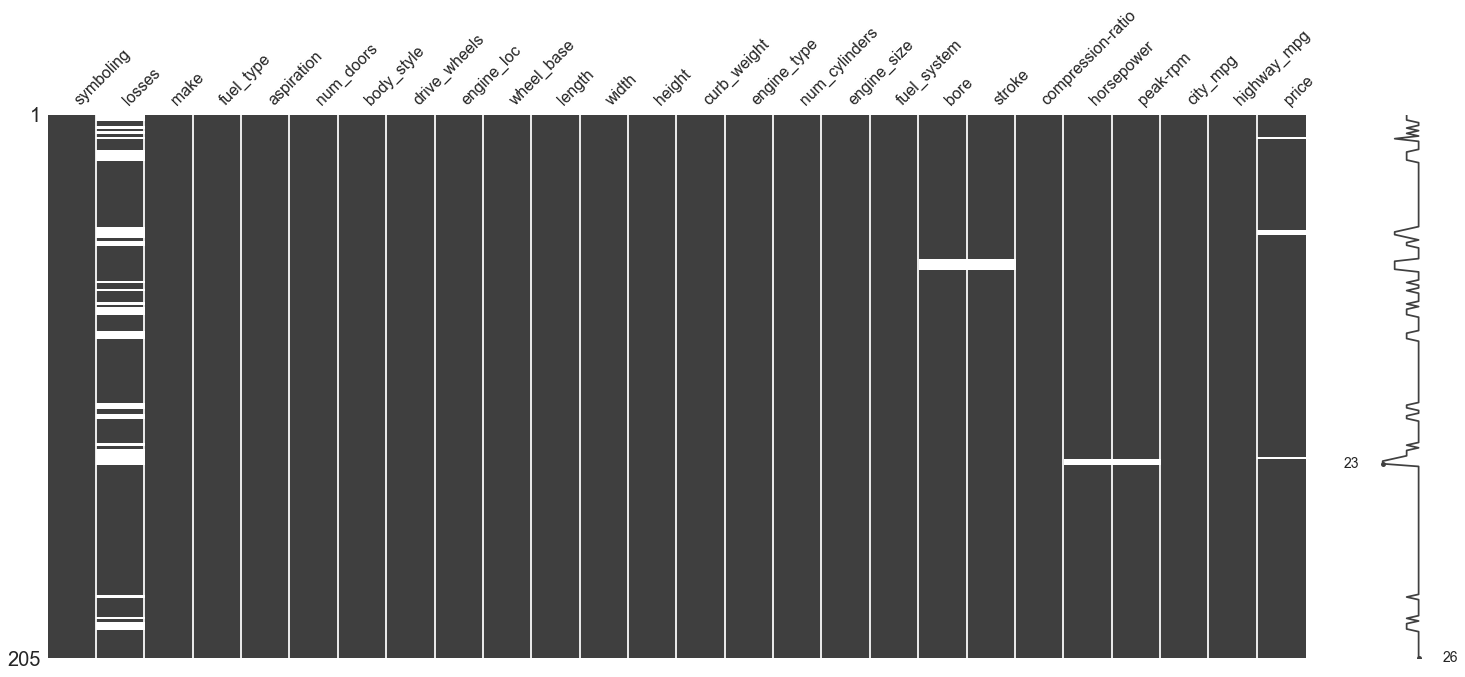

In [6]:
missingno.matrix(cars)

At first glance, it may seem like this is all of the missing values in our data. However, after further inspection, I found that there are several **'?'** values in the data set that we should also consider missing. We can easily just replace those values with NaN values in Pandas.

In [7]:
cars = cars.replace({'?': np.NaN})
cars.head()

symboling  losses         make fuel_type aspiration num_doors   body_style  \
0          3     NaN  alfa-romero       gas        std       two  convertible   
1          3     NaN  alfa-romero       gas        std       two  convertible   
2          1     NaN  alfa-romero       gas        std       two    hatchback   
3          2   164.0         audi       gas        std      four        sedan   
4          2   164.0         audi       gas        std      four        sedan   

  drive_wheels engine_loc  wheel_base  ...  engine_size  fuel_system  bore  \
0          rwd      front        88.6  ...          130         mpfi  3.47   
1          rwd      front        88.6  ...          130         mpfi  3.47   
2          rwd      front        94.5  ...          152         mpfi  2.68   
3          fwd      front        99.8  ...          109         mpfi  3.19   
4          4wd      front        99.4  ...          136         mpfi  3.19   

   stroke compression-ratio horsepower  peak-rpm city_mpg  highway_mpg  \
0    2.68               9.0      111.0    5000.0       21           27   
1    2.68               9.0      111.0    5000.0       21           27   
2    3.47               9.0      154.0    5000.0       19           26   
3    3.40              10.0      102.0    5500.0       24           30   
4    3.40               8.0      115.0    5500.0       18           22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

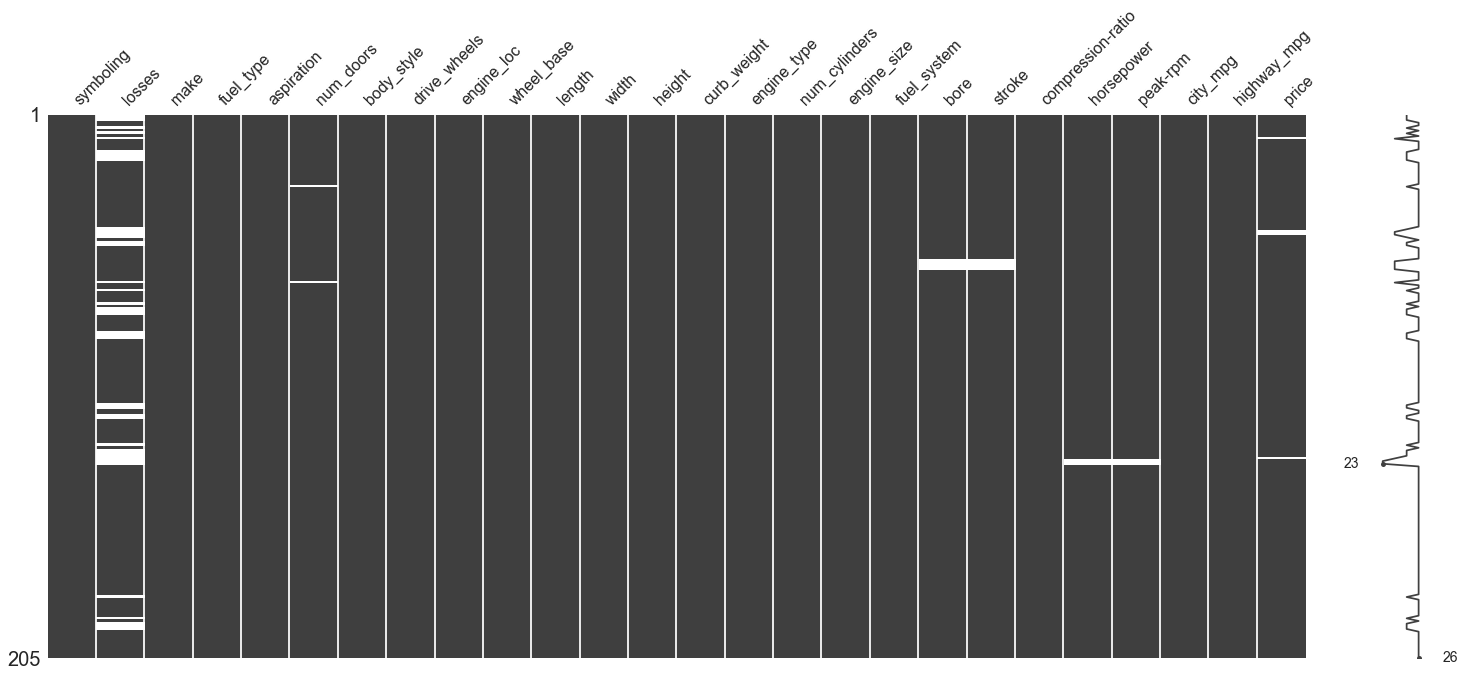

In [8]:
missingno.matrix(cars)

In [9]:
cars.isna().sum()

symboling             0
losses               41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_loc            0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [10]:
cars.isna().mean()

symboling            0.000000
losses               0.200000
make                 0.000000
fuel_type            0.000000
aspiration           0.000000
num_doors            0.009756
body_style           0.000000
drive_wheels         0.000000
engine_loc           0.000000
wheel_base           0.000000
length               0.000000
width                0.000000
height               0.000000
curb_weight          0.000000
engine_type          0.000000
num_cylinders        0.000000
engine_size          0.000000
fuel_system          0.000000
bore                 0.019512
stroke               0.019512
compression-ratio    0.000000
horsepower           0.009756
peak-rpm             0.009756
city_mpg             0.000000
highway_mpg          0.000000
price                0.019512
dtype: float64

Now that we have a better idea where the missing values are, we will eventually need to figure out what we'll do with all of them? Get rid of those rows? Fill them in with some value? How do we determine that value?

## Part 1: Exploratory Data Analysis & Examining Relationships

Ultimately, we are going to develop some models to classify the safety of a car. Therefore, my main goal of this EDA is to **determine if any of the categorical variables can be linked to a car's safety**. After that, we will want to determine relationships among different categorical variables, disregarding their safety. This may be important when assessing model performance later on.

Actuarians use the phrase **symbolling** to represent the riskiness of an asset- in this case cars. Let's take a look what kind of cars we're dealing with.

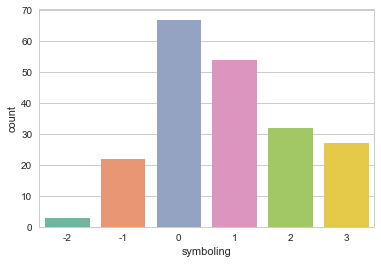

In [11]:
ax = sns.countplot(x='symboling', palette = "Set2", data = cars)

It appears that most cars are relatively "safe." But what determines what cars are safe or not? More than 0? Should we use this information to reduce the number of classes for classification? We'll see...

### Make

Potential Questions:
- What is the distribution of 'makes'? 
- Do certain makes tend to be more risky?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

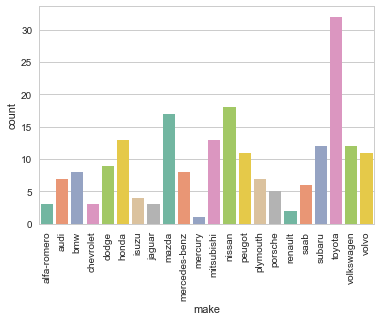

In [12]:
ax = sns.countplot(x="make", palette="Set2", data=cars)
plt.xticks(rotation=90)

In [13]:
cars['make'].value_counts().sort_values(ascending = False)

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
jaguar            3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64

In [14]:
cars['make'].value_counts(normalize = True)

toyota           0.156098
nissan           0.087805
mazda            0.082927
honda            0.063415
mitsubishi       0.063415
subaru           0.058537
volkswagen       0.058537
volvo            0.053659
peugot           0.053659
dodge            0.043902
mercedes-benz    0.039024
bmw              0.039024
audi             0.034146
plymouth         0.034146
saab             0.029268
porsche          0.024390
isuzu            0.019512
alfa-romero      0.014634
jaguar           0.014634
chevrolet        0.014634
renault          0.009756
mercury          0.004878
Name: make, dtype: float64

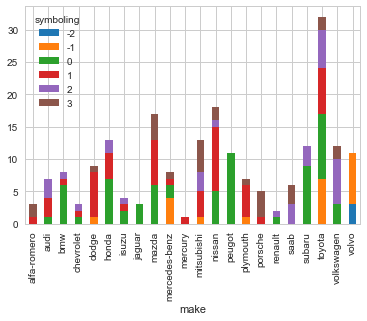

In [15]:
df_plot = cars.groupby(['make', 'symboling']).size().reset_index().pivot(columns='symboling', index='make', values=0)
df_plot.plot(kind='bar', stacked=True)

A couple interesting things from this plot. At first glance, it looks like most makes are pretty evenly spread in terms of which makes have riskier cars. Taking a special look at Volvo, it appears that they have the most unsafe cars, with all of the cars from their brand having -2 and -1 in their bars. It's kind of hard to tell visually if there's particular brands that are relatively safe, so let's now reduce the amount of colors (classes) by just calling a car: "Risky", "Not Risky", or "Neither"

In [16]:
symbolings = list(cars.symboling)
safe_level = []

for i in range(0,len(symbolings)):
    if symbolings[i] == 0:
        safe_level.append('neither')
    elif symbolings[i] < 0:
        safe_level.append('not_risky')
    else:
        safe_level.append('risky')

# for i in range (0,len(symbolings)):
#     if symbolings[i] <= 0:
#         safe_level.append('not_risky')
#     else:
#         safe_level.append('risky')

cars['safety'] = safe_level
cars.safety.value_counts()
    

risky        113
neither       67
not_risky     25
Name: safety, dtype: int64

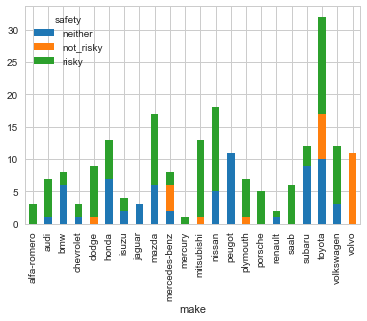

In [133]:
df_plot = cars.groupby(['make', 'safety']).size().reset_index().pivot(columns='safety', index='make', values=0)
df_plot.plot(kind='bar', stacked=True)

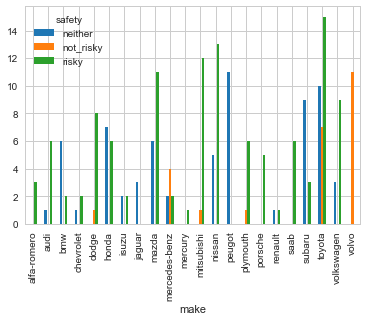

In [18]:
df_plot = cars.groupby(['make', 'safety']).size().reset_index().pivot(columns='safety', index='make', values=0)
df_plot.plot(kind='bar')

It's clearer now which makes are safer than others. As mentioned before, Volvo has all unsafe cars. It can also be seen which makes are comprised of either safe or neither. Note though, the sample size for each make is relatively small, so this most likely is not a compltely accurate representation of all of the cars in that make.

### Aspiration

It might be interesting to see how the different body styles do in terms of **aspiration**

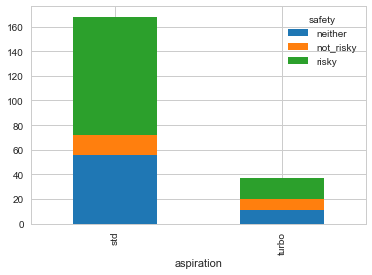

In [19]:
df_plot = cars.groupby(['aspiration', 'safety']).size().reset_index().pivot(columns='safety', index='aspiration', values=0)
df_plot.plot(kind='bar', stacked=True)

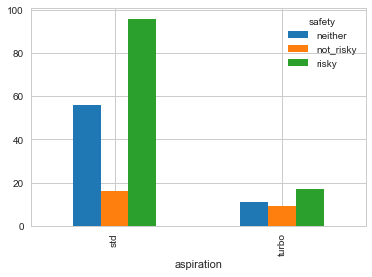

In [20]:
df_plot = cars.groupby(['aspiration', 'safety']).size().reset_index().pivot(columns='safety', index='aspiration', values=0)
df_plot.plot(kind='bar')

### Number of Doors

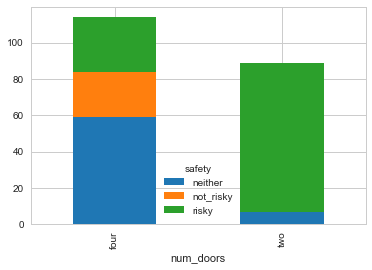

In [21]:
df_plot = cars.groupby(['num_doors', 'safety']).size().reset_index().pivot(columns='safety', index='num_doors', values=0)
df_plot.plot(kind='bar', stacked=True)

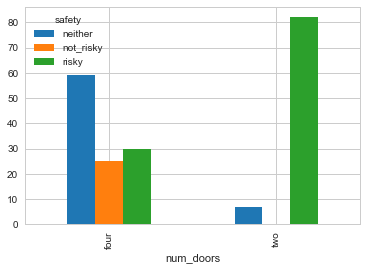

In [22]:
df_plot = cars.groupby(['num_doors', 'safety']).size().reset_index().pivot(columns='safety', index='num_doors', values=0)
df_plot.plot(kind='bar')

### Body Style

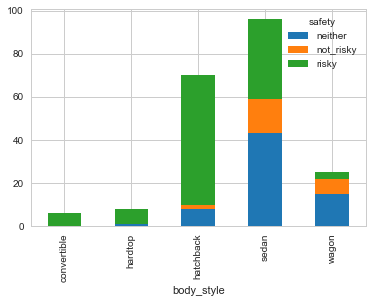

In [23]:
df_plot = cars.groupby(['body_style', 'safety']).size().reset_index().pivot(columns='safety', index='body_style', values=0)
df_plot.plot(kind='bar', stacked=True)

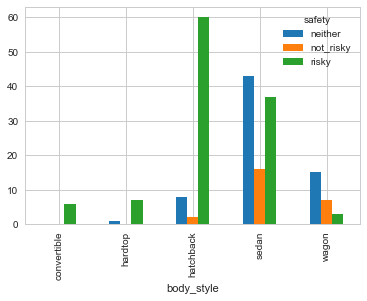

In [24]:
df_plot = cars.groupby(['body_style', 'safety']).size().reset_index().pivot(columns='safety', index='body_style', values=0)
df_plot.plot(kind='bar')

## Finding relationships: Contingency Tables, Chi-Squared Tests, Mosaic plots etc.

Now that we have a pretty decent visual representation of some things we are interested in, we should now take a step further to examine the validity of these visuals. It is not enough for us to say that because there are visual differences in groups that those differences are significant.

In [28]:
def run(table):
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(table)
    return chi2_stat, p_val

In [42]:
def runChi(categories):
    test_stats = []
    p_vals = []
    features = []
    significant = []
    
    for i in range(0, len(categories)):
        test_stat = run(pd.crosstab(cars[categories[i]], cars['safety']))[0]
        p_val = run(pd.crosstab(cars[categories[i]], cars['safety']))[1]
        test_stats.append(test_stat)
        p_vals.append(p_val)
        features.append(categories[i])
        if p_val < 0.05:
            significant.append('significant')
        else:
            significant.append('not_significant')
        
    
    df = pd.DataFrame({'test_stat':test_stats, 'p_val':p_vals, 'feature':features, 'significant': significant})
    df = df.sort_values(by=['p_val'])
    return df

In [43]:
runChi(categories)

test_stat         p_val        feature      significant
3   88.374070  6.453787e-20      num_doors      significant
0  182.975338  1.636926e-19           make      significant
4   64.875648  5.107186e-11     body_style      significant
5   21.644956  2.358120e-04   drive_wheels      significant
7   33.101207  9.334302e-04    engine_type      significant
1   11.316578  3.488481e-03      fuel_type      significant
9   31.048465  5.457554e-03    fuel_system      significant
2    6.256719  4.378958e-02     aspiration      significant
6    2.478752  2.895648e-01     engine_loc  not_significant
8   11.115924  5.190110e-01  num_cylinders  not_significant

## Part 4: Feature Engineering & Data Imputation

Now that we're done with some EDA, let's turn our attention to imputing some of the missing data.

Let's first start with the turning several columns that are strings into numbers.

In [46]:
cols = ['losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
cars[cols] = cars[cols].apply(pd.to_numeric, errors='coerce', axis=1)
cars.head()

symboling  losses         make fuel_type aspiration num_doors   body_style  \
0          3     NaN  alfa-romero       gas        std       two  convertible   
1          3     NaN  alfa-romero       gas        std       two  convertible   
2          1     NaN  alfa-romero       gas        std       two    hatchback   
3          2   164.0         audi       gas        std      four        sedan   
4          2   164.0         audi       gas        std      four        sedan   

  drive_wheels engine_loc  wheel_base  ...  fuel_system  bore  stroke  \
0          rwd      front        88.6  ...         mpfi  3.47    2.68   
1          rwd      front        88.6  ...         mpfi  3.47    2.68   
2          rwd      front        94.5  ...         mpfi  2.68    3.47   
3          fwd      front        99.8  ...         mpfi  3.19    3.40   
4          4wd      front        99.4  ...         mpfi  3.19    3.40   

   compression-ratio horsepower peak-rpm  city_mpg highway_mpg    price  \
0                9.0      111.0   5000.0        21          27  13495.0   
1                9.0      111.0   5000.0        21          27  16500.0   
2                9.0      154.0   5000.0        19          26  16500.0   
3               10.0      102.0   5500.0        24          30  13950.0   
4                8.0      115.0   5500.0        18          22  17450.0   

   safety  
0   risky  
1   risky  
2   risky  
3   risky  
4   risky  

[5 rows x 27 columns]

In [49]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
cars_number = cars.select_dtypes(include = np.number)
cars[cars_number.columns] = imputer.fit_transform(cars_number)
cars

symboling  losses         make fuel_type aspiration num_doors  \
0          3.0   123.8  alfa-romero       gas        std       two   
1          3.0   144.8  alfa-romero       gas        std       two   
2          1.0   144.8  alfa-romero       gas        std       two   
3          2.0   164.0         audi       gas        std      four   
4          2.0   164.0         audi       gas        std      four   
..         ...     ...          ...       ...        ...       ...   
200       -1.0    95.0        volvo       gas        std      four   
201       -1.0    95.0        volvo       gas      turbo      four   
202       -1.0    95.0        volvo       gas        std      four   
203       -1.0    95.0        volvo    diesel      turbo      four   
204       -1.0    95.0        volvo       gas      turbo      four   

      body_style drive_wheels engine_loc  wheel_base  ...  fuel_system  bore  \
0    convertible          rwd      front        88.6  ...         mpfi  3.47   
1    convertible          rwd      front        88.6  ...         mpfi  3.47   
2      hatchback          rwd      front        94.5  ...         mpfi  2.68   
3          sedan          fwd      front        99.8  ...         mpfi  3.19   
4          sedan          4wd      front        99.4  ...         mpfi  3.19   
..           ...          ...        ...         ...  ...          ...   ...   
200        sedan          rwd      front       109.1  ...         mpfi  3.78   
201        sedan          rwd      front       109.1  ...         mpfi  3.78   
202        sedan          rwd      front       109.1  ...         mpfi  3.58   
203        sedan          rwd      front       109.1  ...          idi  3.01   
204        sedan          rwd      front       109.1  ...         mpfi  3.78   

     stroke  compression-ratio horsepower peak-rpm  city_mpg highway_mpg  \
0      2.68                9.0      111.0   5000.0      21.0        27.0   
1      2.68                9.0      111.0   5000.0      21.0        27.0   
2      3.47                9.0      154.0   5000.0      19.0        26.0   
3      3.40               10.0      102.0   5500.0      24.0        30.0   
4      3.40                8.0      115.0   5500.0      18.0        22.0   
..      ...                ...        ...      ...       ...         ...   
200    3.15                9.5      114.0   5400.0      23.0        28.0   
201    3.15                8.7      160.0   5300.0      19.0        25.0   
202    2.87                8.8      134.0   5500.0      18.0        23.0   
203    3.40               23.0      106.0   4800.0      26.0        27.0   
204    3.15                9.5      114.0   5400.0      19.0        25.0   

       price     safety  
0    13495.0      risky  
1    16500.0      risky  
2    16500.0      risky  
3    13950.0      risky  
4    17450.0      risky  
..       ...        ...  
200  16845.0  not_risky  
201  19045.0  not_risky  
202  21485.0  not_risky  
203  22470.0  not_risky  
204  22625.0  not_risky  

[205 rows x 27 columns]

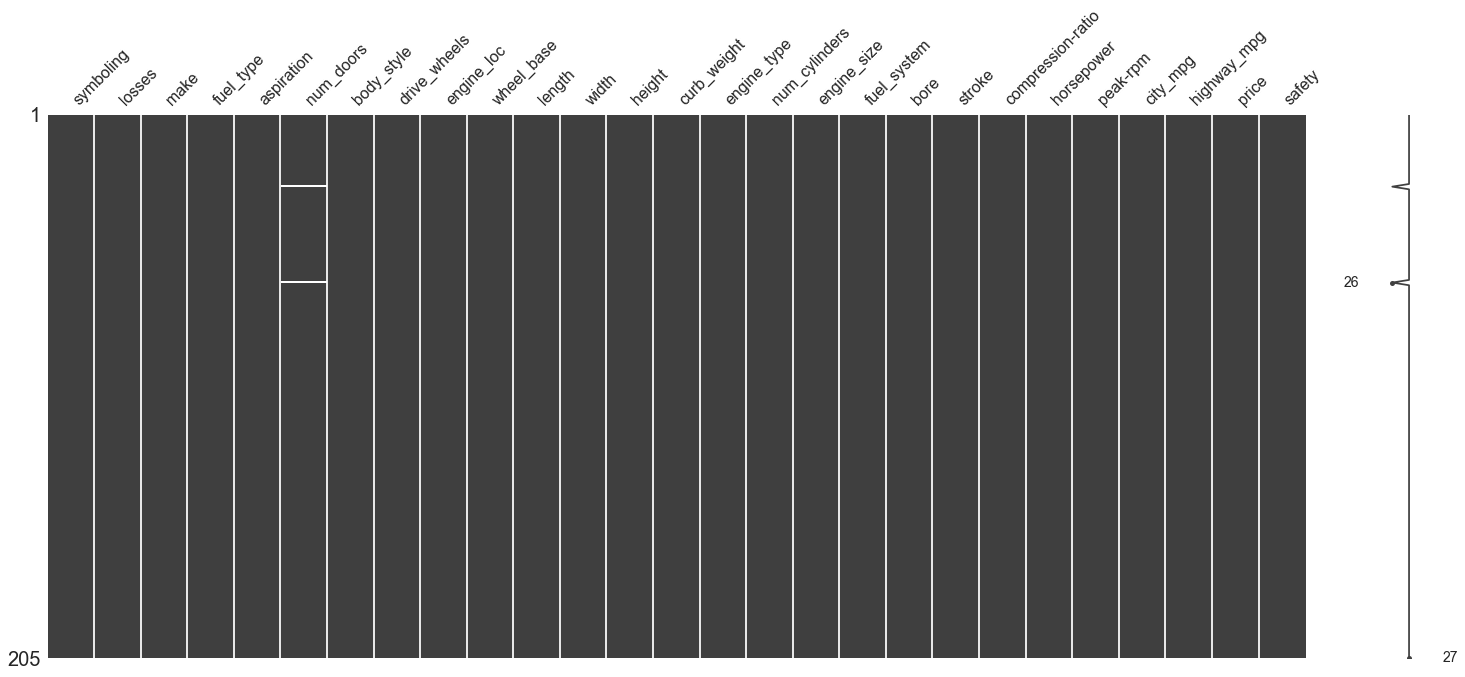

In [50]:
missingno.matrix(cars)

Since num_doors isn't necesarrily a numerical variable, although its values are indeed "numbers," it wasn't counted when we did our big round of imputation. We must do this separately.

In [51]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(cars[['num_doors']])
cars['num_doors'] = imp.transform(cars[['num_doors']])
cars

symboling  losses         make fuel_type aspiration num_doors  \
0          3.0   123.8  alfa-romero       gas        std       two   
1          3.0   144.8  alfa-romero       gas        std       two   
2          1.0   144.8  alfa-romero       gas        std       two   
3          2.0   164.0         audi       gas        std      four   
4          2.0   164.0         audi       gas        std      four   
..         ...     ...          ...       ...        ...       ...   
200       -1.0    95.0        volvo       gas        std      four   
201       -1.0    95.0        volvo       gas      turbo      four   
202       -1.0    95.0        volvo       gas        std      four   
203       -1.0    95.0        volvo    diesel      turbo      four   
204       -1.0    95.0        volvo       gas      turbo      four   

      body_style drive_wheels engine_loc  wheel_base  ...  fuel_system  bore  \
0    convertible          rwd      front        88.6  ...         mpfi  3.47   
1    convertible          rwd      front        88.6  ...         mpfi  3.47   
2      hatchback          rwd      front        94.5  ...         mpfi  2.68   
3          sedan          fwd      front        99.8  ...         mpfi  3.19   
4          sedan          4wd      front        99.4  ...         mpfi  3.19   
..           ...          ...        ...         ...  ...          ...   ...   
200        sedan          rwd      front       109.1  ...         mpfi  3.78   
201        sedan          rwd      front       109.1  ...         mpfi  3.78   
202        sedan          rwd      front       109.1  ...         mpfi  3.58   
203        sedan          rwd      front       109.1  ...          idi  3.01   
204        sedan          rwd      front       109.1  ...         mpfi  3.78   

     stroke  compression-ratio horsepower peak-rpm  city_mpg highway_mpg  \
0      2.68                9.0      111.0   5000.0      21.0        27.0   
1      2.68                9.0      111.0   5000.0      21.0        27.0   
2      3.47                9.0      154.0   5000.0      19.0        26.0   
3      3.40               10.0      102.0   5500.0      24.0        30.0   
4      3.40                8.0      115.0   5500.0      18.0        22.0   
..      ...                ...        ...      ...       ...         ...   
200    3.15                9.5      114.0   5400.0      23.0        28.0   
201    3.15                8.7      160.0   5300.0      19.0        25.0   
202    2.87                8.8      134.0   5500.0      18.0        23.0   
203    3.40               23.0      106.0   4800.0      26.0        27.0   
204    3.15                9.5      114.0   5400.0      19.0        25.0   

       price     safety  
0    13495.0      risky  
1    16500.0      risky  
2    16500.0      risky  
3    13950.0      risky  
4    17450.0      risky  
..       ...        ...  
200  16845.0  not_risky  
201  19045.0  not_risky  
202  21485.0  not_risky  
203  22470.0  not_risky  
204  22625.0  not_risky  

[205 rows x 27 columns]

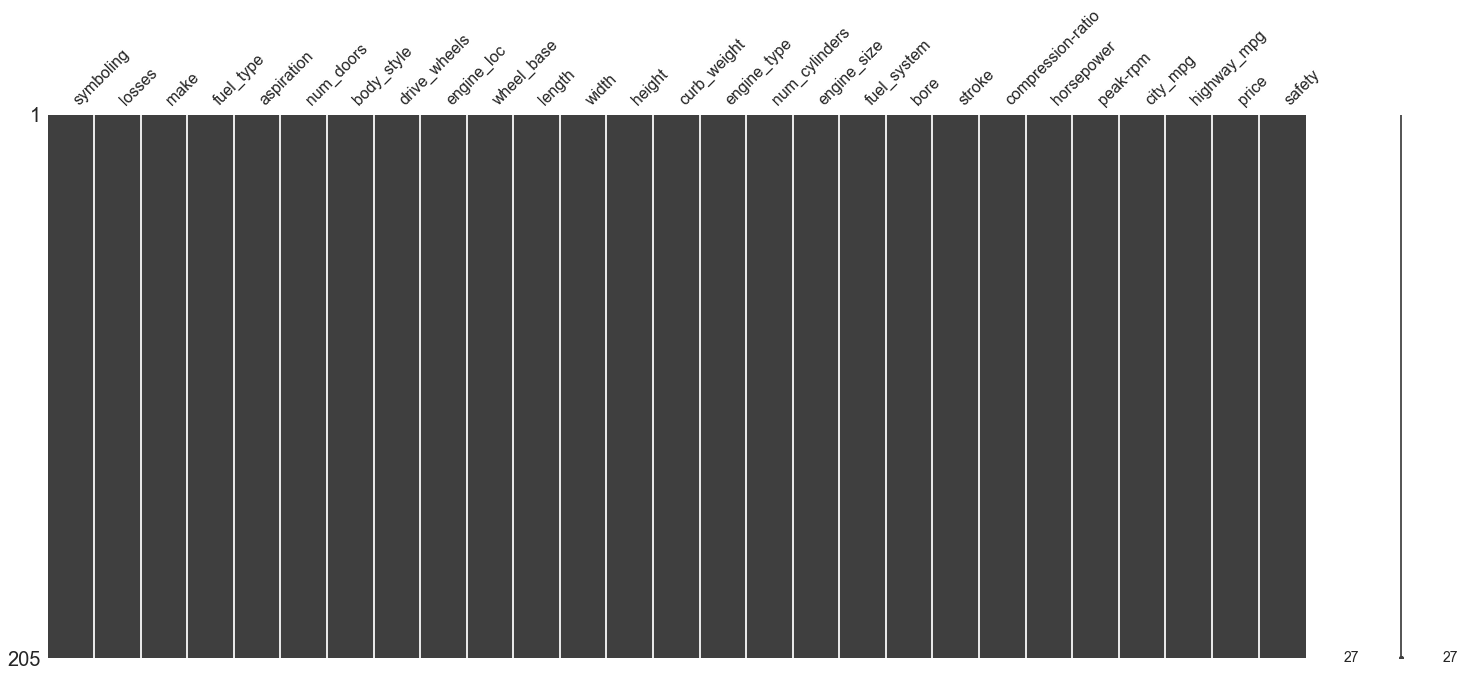

In [52]:
missingno.matrix(cars)

## Encoding numerical variables into bins

Now that we have no more missing data, and our categorical variables are nice and clean, we should now deal with the numerical variables. First, we will split each numerical feature into bins, then replace a car's individual numerical value with the bin group that the car belongs to. Could there be a problem with bin size?

In [53]:
carsTrain = cars
carsTrain['losses_bins'] = pd.cut(cars['losses'], bins = 5)
carsTrain['wheelBase_bins'] = pd.cut(cars['wheel_base'], bins = 5)
carsTrain['length_bins'] = pd.cut(cars['length'], bins = 5)
carsTrain['width_bins'] = pd.cut(cars['width'], bins = 5)
carsTrain['height_bins'] = pd.cut(cars['height'], bins = 5)
carsTrain['curbWeight_bins'] = pd.cut(cars['curb_weight'], bins = 5)
carsTrain['engineSize_bins'] = pd.cut(cars['engine_size'], bins = 5)
carsTrain['bore_bins'] = pd.cut(cars['bore'], bins = 5)
carsTrain['stroke_bins'] = pd.cut(cars['stroke'], bins = 5)
carsTrain['compressionRatio_bins'] = pd.cut(cars['compression-ratio'], bins = 2)
carsTrain['horsepower_bins'] = pd.cut(cars['horsepower'], bins = 5)
carsTrain['peak-rpm_bins'] = pd.cut(cars['peak-rpm'], bins = 5)
carsTrain['city_mpg_bins'] = pd.cut(cars['city_mpg'], bins = 5)
carsTrain['highway_mpg_bins'] = pd.cut(cars['highway_mpg'], bins = 5)
carsTrain['price_bins'] = pd.cut(cars['price'], bins = 5)
carsTrain.head()

symboling  losses         make fuel_type aspiration num_doors   body_style  \
0        3.0   123.8  alfa-romero       gas        std       two  convertible   
1        3.0   144.8  alfa-romero       gas        std       two  convertible   
2        1.0   144.8  alfa-romero       gas        std       two    hatchback   
3        2.0   164.0         audi       gas        std      four        sedan   
4        2.0   164.0         audi       gas        std      four        sedan   

  drive_wheels engine_loc  wheel_base  ...   curbWeight_bins  engineSize_bins  \
0          rwd      front        88.6  ...  (2519.2, 3034.8]   (114.0, 167.0]   
1          rwd      front        88.6  ...  (2519.2, 3034.8]   (114.0, 167.0]   
2          rwd      front        94.5  ...  (2519.2, 3034.8]   (114.0, 167.0]   
3          fwd      front        99.8  ...  (2003.6, 2519.2]  (60.735, 114.0]   
4          4wd      front        99.4  ...  (2519.2, 3034.8]   (114.0, 167.0]   

       bore_bins   stroke_bins compressionRatio_bins horsepower_bins  \
0   (3.38, 3.66]  (2.49, 2.91]         (6.984, 15.0]   (96.0, 144.0]   
1   (3.38, 3.66]  (2.49, 2.91]         (6.984, 15.0]   (96.0, 144.0]   
2  (2.539, 2.82]  (3.33, 3.75]         (6.984, 15.0]  (144.0, 192.0]   
3    (3.1, 3.38]  (3.33, 3.75]         (6.984, 15.0]   (96.0, 144.0]   
4    (3.1, 3.38]  (3.33, 3.75]         (6.984, 15.0]   (96.0, 144.0]   

      peak-rpm_bins   city_mpg_bins  highway_mpg_bins          price_bins  
0  (4640.0, 5130.0]    (20.2, 27.4]      (23.6, 31.2]  (13174.4, 21230.8]  
1  (4640.0, 5130.0]    (20.2, 27.4]      (23.6, 31.2]  (13174.4, 21230.8]  
2  (4640.0, 5130.0]  (12.964, 20.2]      (23.6, 31.2]  (13174.4, 21230.8]  
3  (5130.0, 5620.0]    (20.2, 27.4]      (23.6, 31.2]  (13174.4, 21230.8]  
4  (5130.0, 5620.0]  (12.964, 20.2]    (15.962, 23.6]  (13174.4, 21230.8]  

[5 rows x 42 columns]

In [54]:
carsTrain = carsTrain.drop(['losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size'
                            ,'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city_mpg'
                            ,'highway_mpg', 'price'], axis = 1)
carsTrain.head()

symboling         make fuel_type aspiration num_doors   body_style  \
0        3.0  alfa-romero       gas        std       two  convertible   
1        3.0  alfa-romero       gas        std       two  convertible   
2        1.0  alfa-romero       gas        std       two    hatchback   
3        2.0         audi       gas        std      four        sedan   
4        2.0         audi       gas        std      four        sedan   

  drive_wheels engine_loc engine_type num_cylinders  ...   curbWeight_bins  \
0          rwd      front        dohc          four  ...  (2519.2, 3034.8]   
1          rwd      front        dohc          four  ...  (2519.2, 3034.8]   
2          rwd      front        ohcv           six  ...  (2519.2, 3034.8]   
3          fwd      front         ohc          four  ...  (2003.6, 2519.2]   
4          4wd      front         ohc          five  ...  (2519.2, 3034.8]   

   engineSize_bins      bore_bins   stroke_bins compressionRatio_bins  \
0   (114.0, 167.0]   (3.38, 3.66]  (2.49, 2.91]         (6.984, 15.0]   
1   (114.0, 167.0]   (3.38, 3.66]  (2.49, 2.91]         (6.984, 15.0]   
2   (114.0, 167.0]  (2.539, 2.82]  (3.33, 3.75]         (6.984, 15.0]   
3  (60.735, 114.0]    (3.1, 3.38]  (3.33, 3.75]         (6.984, 15.0]   
4   (114.0, 167.0]    (3.1, 3.38]  (3.33, 3.75]         (6.984, 15.0]   

  horsepower_bins     peak-rpm_bins   city_mpg_bins highway_mpg_bins  \
0   (96.0, 144.0]  (4640.0, 5130.0]    (20.2, 27.4]     (23.6, 31.2]   
1   (96.0, 144.0]  (4640.0, 5130.0]    (20.2, 27.4]     (23.6, 31.2]   
2  (144.0, 192.0]  (4640.0, 5130.0]  (12.964, 20.2]     (23.6, 31.2]   
3   (96.0, 144.0]  (5130.0, 5620.0]    (20.2, 27.4]     (23.6, 31.2]   
4   (96.0, 144.0]  (5130.0, 5620.0]  (12.964, 20.2]   (15.962, 23.6]   

           price_bins  
0  (13174.4, 21230.8]  
1  (13174.4, 21230.8]  
2  (13174.4, 21230.8]  
3  (13174.4, 21230.8]  
4  (13174.4, 21230.8]  

[5 rows x 27 columns]

In [55]:
carsTrain = pd.get_dummies(carsTrain, carsTrain.columns[1:], drop_first = True)
carsTrain.head()

symboling  make_audi  make_bmw  make_chevrolet  make_dodge  make_honda  \
0        3.0          0         0               0           0           0   
1        3.0          0         0               0           0           0   
2        1.0          0         0               0           0           0   
3        2.0          1         0               0           0           0   
4        2.0          1         0               0           0           0   

   make_isuzu  make_jaguar  make_mazda  make_mercedes-benz  ...  \
0           0            0           0                   0  ...   
1           0            0           0                   0  ...   
2           0            0           0                   0  ...   
3           0            0           0                   0  ...   
4           0            0           0                   0  ...   

   city_mpg_bins_(34.6, 41.8]  city_mpg_bins_(41.8, 49.0]  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   highway_mpg_bins_(23.6, 31.2]  highway_mpg_bins_(31.2, 38.8]  \
0                              1                              0   
1                              1                              0   
2                              1                              0   
3                              1                              0   
4                              0                              0   

   highway_mpg_bins_(38.8, 46.4]  highway_mpg_bins_(46.4, 54.0]  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   price_bins_(13174.4, 21230.8]  price_bins_(21230.8, 29287.2]  \
0                              1                              0   
1                              1                              0   
2                              1                              0   
3                              1                              0   
4                              1                              0   

   price_bins_(29287.2, 37343.6]  price_bins_(37343.6, 45400.0]  
0                              0                              0  
1                              0                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0  

[5 rows x 110 columns]

## Part 5: Feature Selection/Model Fitting

Now that the data cleaning and pre-processing are complete, we want to now fit the data with some machine learning algorithms for classification. Based on the other features of a car, can our model classsify what its safety level should be? We first begin by using all of the features in the model, then we may possibly be able to take some features out to improve strength. Can we remove some correlated variables? Why don't we just use the important categorical (or numerical variables). Let's see!

In [56]:
X = carsTrain.iloc[:,1:]
Y = carsTrain.symboling

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.3, random_state=10)

In [58]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_test, Y_test) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [59]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Test Accuracy: 77.42
Accuracy CV 10-Fold: 80.42


### K-Nearest Neighbors

In [60]:
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Test Accuracy: 59.68
Accuracy CV 10-Fold: 64.34


### Stochastic Gradient Descent

In [61]:
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)

Test Accuracy: 80.65
Accuracy CV 10-Fold: 81.82


### Decision Tree

In [62]:
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Test Accuracy: 83.87
Accuracy CV 10-Fold: 87.41


### Gradient Boost

In [63]:
train_pred_gb, acc_gb, acc_cv_gb = fit_ml_algo(GradientBoostingClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_gb)
print("Accuracy CV 10-Fold: %s" % acc_cv_gb)

Test Accuracy: 83.87
Accuracy CV 10-Fold: 90.21


## Part 6: Feature Selection, Redo Models

Our models performed decently when trying to classify the risk of a car but maybe we can do better? Maybe we can use only the important features when training the model with **important and relevant features**.

Let's first take a look again at our categorical features. We noticed previously that most of the categorical features have an effect on a car's riskiness. The question we should tackle now 

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = carsTrain.iloc[:,1:]
Y = carsTrain.symboling
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k = 10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                              Specs       Score
50                 safety_not_risky  180.000000
20                       make_volvo   99.123967
51                     safety_risky   92.000000
23                    num_doors_two   56.165360
57  wheelBase_bins_(100.32, 107.18]   35.077238
80            bore_bins_(2.82, 3.1]   32.589896
25             body_style_hatchback   31.718384
60       length_bins_(154.5, 167.9]   30.269862
62       length_bins_(181.3, 194.7]   27.891013
43                 fuel_system_2bbl   27.828973


In [66]:
featureScores.Specs

0                          make_audi
1                           make_bmw
2                     make_chevrolet
3                         make_dodge
4                         make_honda
                   ...              
104    highway_mpg_bins_(46.4, 54.0]
105    price_bins_(13174.4, 21230.8]
106    price_bins_(21230.8, 29287.2]
107    price_bins_(29287.2, 37343.6]
108    price_bins_(37343.6, 45400.0]
Name: Specs, Length: 109, dtype: object

[3.69733117e-03 2.35920412e-03 1.73339104e-03 3.47940319e-03
 4.45312297e-03 1.50925723e-03 4.87153692e-04 4.42108028e-03
 2.74553522e-03 5.14119164e-04 1.68881734e-02 5.19306861e-03
 7.13905302e-03 2.06003430e-03 1.55615184e-03 1.40903699e-03
 4.73395465e-03 6.58701961e-03 1.41896583e-02 1.29910486e-02
 1.39673993e-02 1.35218075e-03 8.70314268e-03 4.77900401e-02
 4.84536885e-03 2.19424679e-02 2.25467107e-02 6.70827313e-03
 7.49089378e-03 7.67949335e-03 9.84199350e-04 6.37109359e-04
 5.12280412e-03 1.35718365e-02 5.01829627e-03 2.20885784e-03
 1.85082575e-03 4.06219397e-03 5.91135517e-03 4.50667271e-03
 3.51064664e-04 2.97514859e-04 2.70996582e-03 1.96788603e-02
 1.41120490e-03 1.55452418e-03 2.11074731e-05 1.08975744e-02
 4.82594341e-03 5.94775637e-04 7.20002312e-02 1.54428945e-01
 1.65553713e-02 2.05648298e-02 5.30870861e-03 3.10118685e-03
 2.29486439e-02 1.34637996e-02 4.08855509e-03 7.01177260e-04
 1.23693667e-02 9.60322247e-03 6.69729106e-03 1.11304784e-03
 1.95892089e-02 2.086155

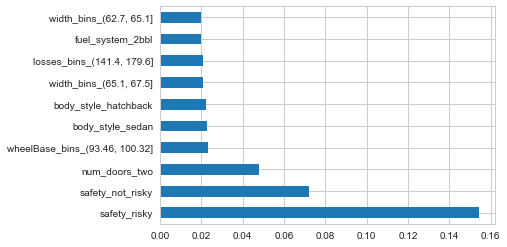

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

It appears that some of the models perform better with less predictors, and others with more predictors. Let's try to figure out the optimal number of predictors for each model!

In [77]:
def fit_ml_algo(algo, X_train, Y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, Y_train)
    acc = round(model.score(X_test, Y_test) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  Y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [127]:
lr_test = []
lr_cv = []
features = []
for i in range(10,len(carsTrain.columns)):
    cars_best = carsTrain[featureScores.nlargest(i,'Score')['Specs']]
    X = cars_best.iloc[:, 1:]
    Y = carsTrain.symboling
    X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.1, random_state=10)
    train_pred, test_acc, cv_acc = fit_ml_algo(LogisticRegression(), X_train, Y_train, 10)
    lr_cv.append(cv_acc)
    features.append('log_reg')
    

In [128]:
lr_accs = pd.DataFrame({'cv_acc': lr_cv, 'num_features' :np.arange(10,len(carsTrain.columns)), 'feature': features})
lr_accs

cv_acc  num_features  feature
0    71.20            10  log_reg
1    73.91            11  log_reg
2    76.09            12  log_reg
3    76.09            13  log_reg
4    76.09            14  log_reg
..     ...           ...      ...
95   78.80           105  log_reg
96   78.80           106  log_reg
97   78.80           107  log_reg
98   78.80           108  log_reg
99   78.80           109  log_reg

[100 rows x 3 columns]

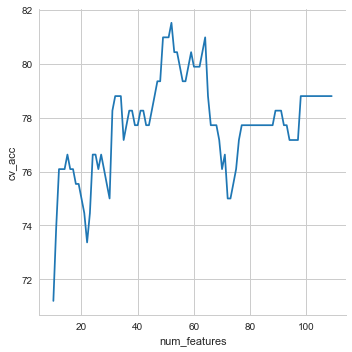

In [80]:
sns.relplot(x="num_features", y="cv_acc", kind = 'line', data = lr_accs)

### K-Nearest Neighbors

In [108]:
knn_test = []
knn_cv = []
features = []
for i in range(10,len(carsTrain.columns)):
    cars_best = carsTrain[featureScores.nlargest(i,'Score')['Specs']]
    X = cars_best.iloc[:, 1:]
    Y = carsTrain.symboling
    X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.1, random_state=10)
    train_pred, test_acc, cv_acc = fit_ml_algo(KNeighborsClassifier(), X_train, Y_train, 10)
    knn_cv.append(cv_acc)
    features.append('knn')
    

In [111]:
knn_accs = pd.DataFrame({'cv_acc': knn_cv, 'num_features' :np.arange(10,len(carsTrain.columns)),'feature':features} )
knn_accs

cv_acc  num_features feature
0    69.57            10     knn
1    73.37            11     knn
2    70.65            12     knn
3    69.57            13     knn
4    69.57            14     knn
..     ...           ...     ...
95   65.22           105     knn
96   65.22           106     knn
97   64.67           107     knn
98   64.67           108     knn
99   65.22           109     knn

[100 rows x 3 columns]

In [115]:
pd.concat([lr_accs, knn_accs])

cv_acc  num_features feature
0    71.20            10     knn
1    73.91            11     knn
2    76.09            12     knn
3    76.09            13     knn
4    76.09            14     knn
..     ...           ...     ...
95   65.22           105     knn
96   65.22           106     knn
97   64.67           107     knn
98   64.67           108     knn
99   65.22           109     knn

[200 rows x 3 columns]

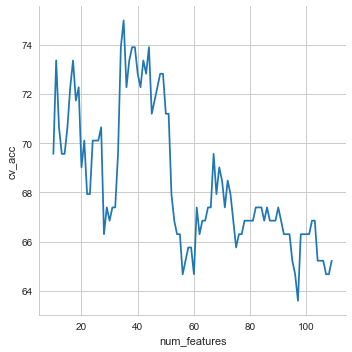

In [83]:
sns.relplot(x="num_features", y="cv_acc", kind = 'line', data = knn_accs)

### Stochastic Gradient Descent

In [116]:
sgd_test = []
sgd_cv = []
features = []
for i in range(10,len(carsTrain.columns)):
    cars_best = carsTrain[featureScores.nlargest(i,'Score')['Specs']]
    X = cars_best.iloc[:, 1:]
    Y = carsTrain.symboling
    X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.1, random_state=10)
    train_pred, test_acc, cv_acc = fit_ml_algo(LinearSVC(), X_train, Y_train, 10)
    sgd_cv.append(cv_acc)
    features.append('sgd')
    

In [117]:
sgd_accs = pd.DataFrame({'cv_acc': sgd_cv, 'num_features' :np.arange(10,len(carsTrain.columns)), 'feature': features})
sgd_accs

cv_acc  num_features feature
0    71.20            10     sgd
1    75.54            11     sgd
2    74.46            12     sgd
3    74.46            13     sgd
4    74.46            14     sgd
..     ...           ...     ...
95   77.17           105     sgd
96   77.72           106     sgd
97   77.17           107     sgd
98   77.17           108     sgd
99   77.17           109     sgd

[100 rows x 3 columns]

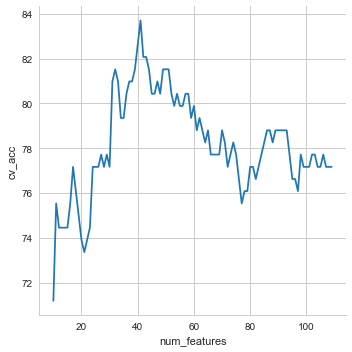

In [86]:
sns.relplot(x="num_features", y="cv_acc", kind = 'line', data = sgd_accs)

### Decision Tree

In [118]:
dt_test = []
dt_cv = []
features = []
for i in range(10,len(carsTrain.columns)):
    cars_best = carsTrain[featureScores.nlargest(i,'Score')['Specs']]
    X = cars_best.iloc[:, 1:]
    Y = carsTrain.symboling
    X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.1, random_state=10)
    train_pred, test_acc, cv_acc = fit_ml_algo(DecisionTreeClassifier(), X_train, Y_train, 10)
    dt_cv.append(cv_acc)
    features.append('dt')

In [119]:
dt_accs = pd.DataFrame({'cv_acc': dt_cv, 'num_features' :np.arange(10,len(carsTrain.columns)), 'feature':features})
dt_accs

cv_acc  num_features feature
0    76.63            10      dt
1    77.72            11      dt
2    77.72            12      dt
3    77.17            13      dt
4    76.63            14      dt
..     ...           ...     ...
95   80.98           105      dt
96   81.52           106      dt
97   80.98           107      dt
98   81.52           108      dt
99   80.98           109      dt

[100 rows x 3 columns]

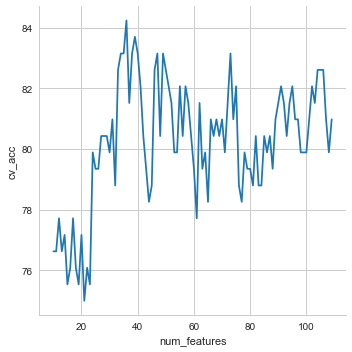

In [89]:
sns.relplot(x="num_features", y="cv_acc", kind = 'line', data = dt_accs)

### Gradient Boost

In [120]:
gb_test = []
gb_cv = []
features = []
for i in range(10,len(carsTrain.columns)):
    cars_best = carsTrain[featureScores.nlargest(i,'Score')['Specs']]
    X = cars_best.iloc[:, 1:]
    Y = carsTrain.symboling
    X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.1, random_state=10)
    train_pred, test_acc, cv_acc = fit_ml_algo(GradientBoostingClassifier(), X_train, Y_train, 10)
    gb_cv.append(cv_acc)
    features.append('gb')

In [122]:
gb_accs = pd.DataFrame({'cv_acc': gb_cv, 'num_features' :np.arange(10,len(carsTrain.columns)),'feature': features})
gb_accs

cv_acc  num_features feature
0    76.63            10      gb
1    82.07            11      gb
2    80.98            12      gb
3    79.35            13      gb
4    79.35            14      gb
..     ...           ...     ...
95   83.70           105      gb
96   84.78           106      gb
97   83.15           107      gb
98   83.70           108      gb
99   82.61           109      gb

[100 rows x 3 columns]

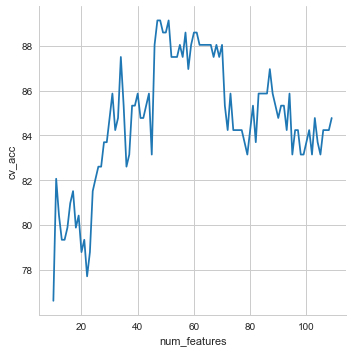

In [92]:
sns.relplot(x="num_features", y="cv_acc", kind = 'line', data = gb_accs)

In [129]:
combo = pd.concat([lr_accs, knn_accs, sgd_accs, dt_accs, gb_accs])
combo

cv_acc  num_features  feature
0    71.20            10  log_reg
1    73.91            11  log_reg
2    76.09            12  log_reg
3    76.09            13  log_reg
4    76.09            14  log_reg
..     ...           ...      ...
95   83.70           105       gb
96   84.78           106       gb
97   83.15           107       gb
98   83.70           108       gb
99   82.61           109       gb

[500 rows x 3 columns]

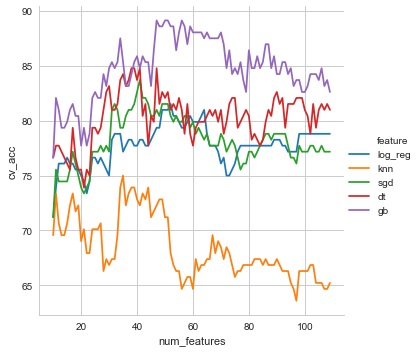

In [131]:
sns.relplot(x="num_features", y="cv_acc", hue = 'feature', kind = 'line', data = combo)